In [1]:
# Выбрала город Бостон, штат Массачусетс, США


## Задание 1 (0.25 балла): Загрузка и чтение данных

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('C:/Users/AcerA3/datasets/listings.csv')

In [3]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,24,2022-09-05,0.26,1,87,2,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,118,2022-12-05,0.69,10,21,8,Approved by the government
2,2021489,Spacious Updated Boston Room/Condo,10197317,Shannon,NaN,South Boston,42.33375,-71.04767,Private room,231,29,86,2022-08-31,1.02,5,342,1,STR-383155
3,2108738,Back Bay Studio,10750832,Tom,NaN,Back Bay,42.35040,-71.08891,Entire home/apt,70,91,34,2016-08-14,0.30,1,0,0,NaN
4,2126053,"Studio, w kitchenette, in owner's Beacon Hill ...",10844648,Janet,NaN,Beacon Hill,42.35771,-71.06978,Entire home/apt,165,29,117,2023-03-14,1.08,1,147,6,STR-395757


## Задание 2 (1.25 балла): Предобработка данных

In [4]:
# Исследую пропущенные значения в наборе данных. Определяю столбцы с большим количеством пропущенных значений.
df.isna().sum()

# Пропуски обнаружила в столбцах "neighbourhood_group" - 3864 пропущенных значений, "last_review" - 1123 пропуска, 
# "reviews_per_month" - 1123 пропуска, "license" - 1559 пропусков.
# В столбце "neighbourhood_group" все значения пропущены, из чего следует, что данный столбец не представляет интерес для анализа.

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3864
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1123
reviews_per_month                 1123
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1559
dtype: int64

In [6]:
# В связи с отсутствием значений в столбце "neighbourhood_group", я удаляю этот столбец
df.drop("neighbourhood_group", axis=1, inplace=True)

# проверю, удалился ли столбец
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.364130,-71.029910,Entire home/apt,132,32,24,2022-09-05,0.26,1,87,2,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,Roxbury,42.328440,-71.095810,Entire home/apt,149,3,118,2022-12-05,0.69,10,21,8,Approved by the government
2,2021489,Spacious Updated Boston Room/Condo,10197317,Shannon,South Boston,42.333750,-71.047670,Private room,231,29,86,2022-08-31,1.02,5,342,1,STR-383155
3,2108738,Back Bay Studio,10750832,Tom,Back Bay,42.350400,-71.088910,Entire home/apt,70,91,34,2016-08-14,0.30,1,0,0,NaN
4,2126053,"Studio, w kitchenette, in owner's Beacon Hill ...",10844648,Janet,Beacon Hill,42.357710,-71.069780,Entire home/apt,165,29,117,2023-03-14,1.08,1,147,6,STR-395757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,840898745853352647,"Cozy, Sunny Bedroom/Boston/UMASS",502371178,Emil,Dorchester,42.307301,-71.076004,Private room,45,1,0,NaN,NaN,12,359,0,Exempt: This listing is a unit that has contra...
3860,841300163917010243,Lake View Fabulous modern2Br 2Ba,163848078,Adam,Jamaica Plain,42.328629,-71.112177,Entire home/apt,318,6,1,2023-03-13,1.00,47,348,1,Str-072579
3861,841306752947174130,"Back Bay One Bedroom, Ready For Long Stays!",11363632,Ashley,Back Bay,42.354257,-71.078665,Entire home/apt,163,92,0,NaN,NaN,1,352,0,NaN
3862,841340391794964228,Residential home 5 bedrooms with free parking,504179464,Bill,Mattapan,42.275860,-71.072287,Entire home/apt,461,4,0,NaN,NaN,1,261,0,STR-517953


In [8]:
# Проверю, есть ли дубликаты с помощью метода duplicated()
df.duplicated().sum()

# Выявила, что дубликатов в таблице нет.

0

In [9]:
# Преобразую тип данных столбца 'last_review', с типом данных object в формат datetime.
df['last_review']=pd.to_datetime(df['last_review'])

# Снова проверяю информацию о таблице, чтобы убедиться, что формат значений столбца 'Date' поменялся на временной
df['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3864 entries, 0 to 3863
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
2741 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 30.3 KB


In [119]:
# Обрабатываю пропуски в столбцах "last_review", "reviews_per_month" путем удаления всех строчек, в которых есть пропуски
# (так как в колонках пропущено меньше чем 40% данных, при этом данных много),сохраняя модифицированную таблицу в новую переменную.
df1=df.dropna(subset = ['last_review', 'reviews_per_month'])

In [120]:
# перепроверяю себя
df1.isna().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           707
dtype: int64

In [14]:
# Обрабатываю пропуски в столбце "license", путем генерации случайных значений из имеющихся данных колонки.
# Создаю массив, который содержит случайные элементы столбца (в котором нужно заменить пропуски)
np.random.choice(df1['license'].dropna(), df1.shape[0])

# Конвертирую массив в формат Series
pd.Series(np.random.choice(df1['license'].dropna(), df1.shape[0]))

# Заменяю пропуски на случайный элемент из этого Series объекта
df1['license']=df1['license'].fillna(pd.Series(np.random.choice(df1['license'].dropna(), df1.shape[0])))

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1516\3204406772.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['license']=df1['license'].fillna(pd.Series(np.random.choice(df1['license'].dropna(), df1.shape[0])))


In [15]:
# перепроверяю себя
df1.isna().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
license                           52
dtype: int64

In [16]:
# По какой-то причине, после замены пропусков на случайные значения в столбце "license", заменились не все пропуски, осталось 52 пропущенных занчения. Почему, так и не поняла.
# Я удалю данные пропуски и сохраню модифицированную таблицу в новую переменную 
df2=df1.dropna(subset=['license'])

In [17]:
# Проверю, что я обработала все пропуски
df2.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [122]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2689 entries, 0 to 3860
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2689 non-null   int64         
 1   name                            2689 non-null   object        
 2   host_id                         2689 non-null   int64         
 3   host_name                       2689 non-null   object        
 4   neighbourhood                   2689 non-null   object        
 5   latitude                        2689 non-null   float64       
 6   longitude                       2689 non-null   float64       
 7   room_type                       2689 non-null   object        
 8   price                           2689 non-null   int64         
 9   minimum_nights                  2689 non-null   int64         
 10  number_of_reviews               2689 non-null   int64         
 11  last

### Предоставление вывода о структуре и типах данных DataFrame после предварительной обработки.
После обработки пропусков датафрейм  содержит 2689 строки и 17 столбцов. Столбцы имеют следующие названия: "id" "name", "host_id", "host_name", "neighbourhood", "latitude", "longitude" "room_type", "price", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm", "license". Значения в каждой ячейке представлены следующими типами данных: строки, плавающие/целые числа, дата и время.

## Задание 3 (1.25 балла): Исследование выбросов

Text(0.5, 1.0, 'price')

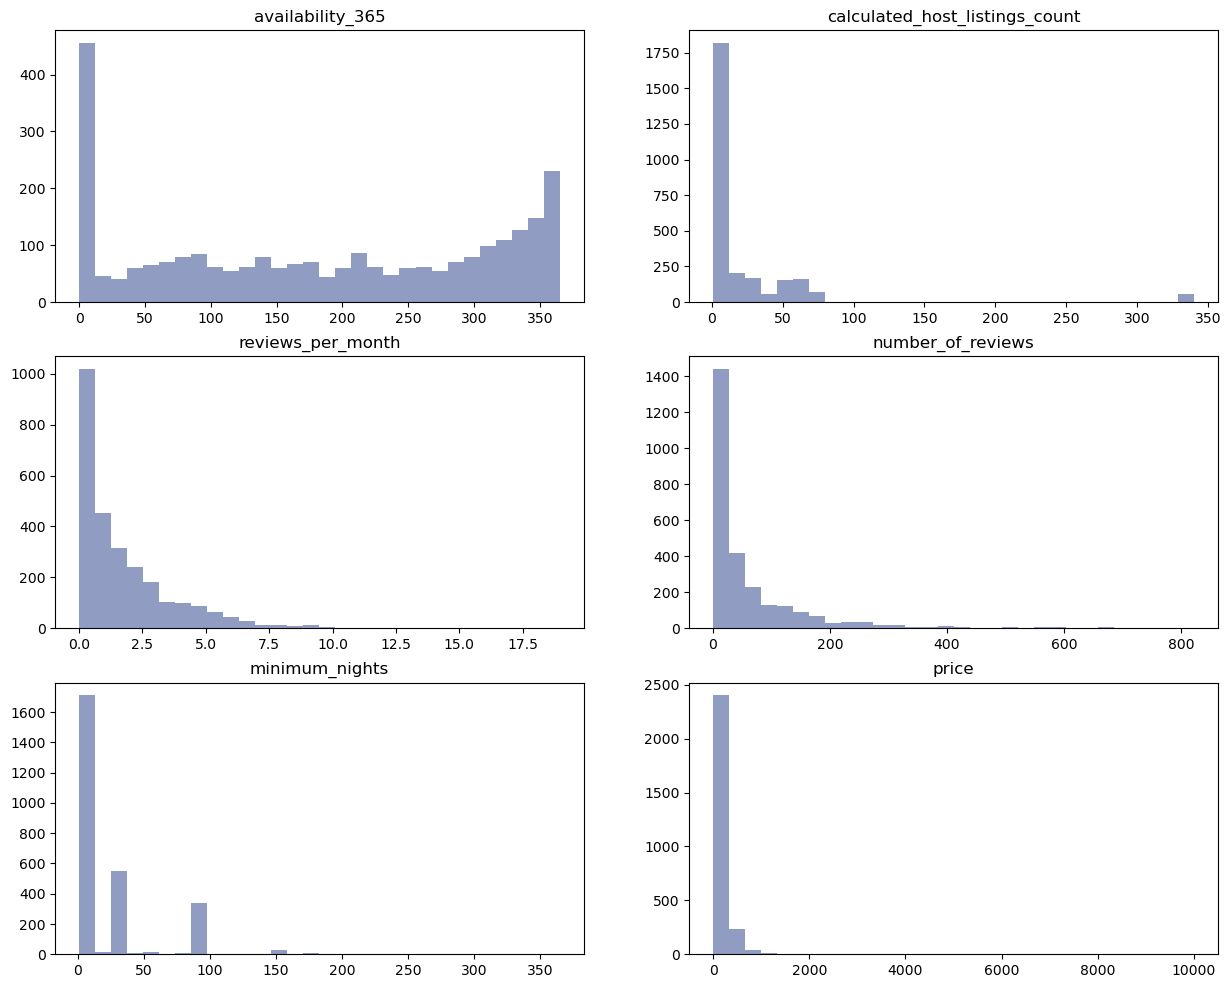

In [20]:
# Визуализирую распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots).
fig, ax = plt.subplots(3,2, figsize=(15,12))

#1 график
ax[0][0].hist(df2['availability_365'], bins=30, color = '#909CC2')#гистограмма
ax[0][0].set_title("availability_365") #заголовок

#2 график
ax[0][1].hist(df2['calculated_host_listings_count'], bins=30, color = '#909CC2')
ax[0][1].set_title("calculated_host_listings_count") #заголовок


#3 график
ax[1][0].hist(df2['reviews_per_month'], bins=30, color = '#909CC2')
ax[1][0].set_title("reviews_per_month")

#4 график
ax[1][1].hist(df2['number_of_reviews'], bins=30, color = '#909CC2')
ax[1][1].set_title("number_of_reviews")

#5 график
ax[2][0].hist(df2['minimum_nights'], bins=30, color = '#909CC2')
ax[2][0].set_title("minimum_nights")

ax[2][1].hist(df2['price'], bins=30, color = '#909CC2')
ax[2][1].set_title("price")


Text(0.5, 1.0, 'price')

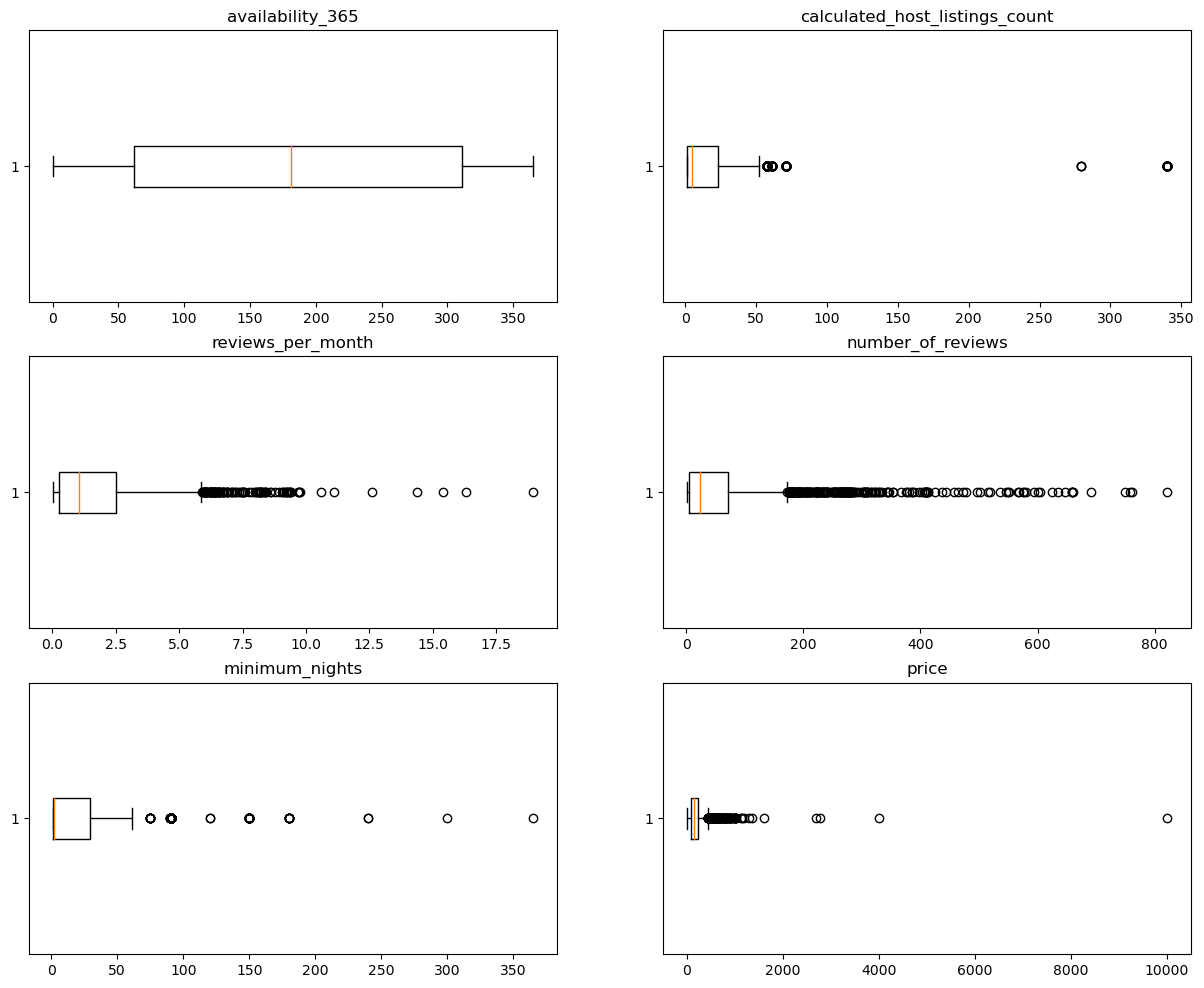

In [21]:
# Построю ящики с усами, для того, чтобы явно различать выбросы
fig, ax = plt.subplots(3,2, figsize=(15,12))

#1 график
ax[0][0].boxplot(df2['availability_365'], vert=False)#гистограмма
ax[0][0].set_title("availability_365") #заголовок

#2 график
ax[0][1].boxplot(df2['calculated_host_listings_count'], vert=False)
ax[0][1].set_title("calculated_host_listings_count") 


#3 график
ax[1][0].boxplot(df2['reviews_per_month'], vert=False)
ax[1][0].set_title("reviews_per_month")
#4 график
ax[1][1].boxplot(df2['number_of_reviews'], vert=False)
ax[1][1].set_title("number_of_reviews")

#5 график
ax[2][0].boxplot(df2['minimum_nights'], vert=False)
ax[2][0].set_title("minimum_nights")

#6 график
ax[2][1].boxplot(df2['price'], vert=False)
ax[2][1].set_title("price")


Видно, что все переменные кроме 'availability_365', имеют выбросы, все переменные имеют ненормальное распределение со скосом вправо в большей или меньшей степени

In [25]:
# Удалю выбросы явно выбивающиеся из ряда данных для каждой переменной.
# Сохраню в новую переменную обработанные столбцы без ярковыраженных выбросов
df3=df2[(df2['calculated_host_listings_count']<=100)&(df2['reviews_per_month']<=10)&(df2['number_of_reviews']<=400)&(df2['minimum_nights']<=100)&(df2['price']<=2000)]
df3.shape

(2542, 17)

Text(0.5, 1.0, 'price')

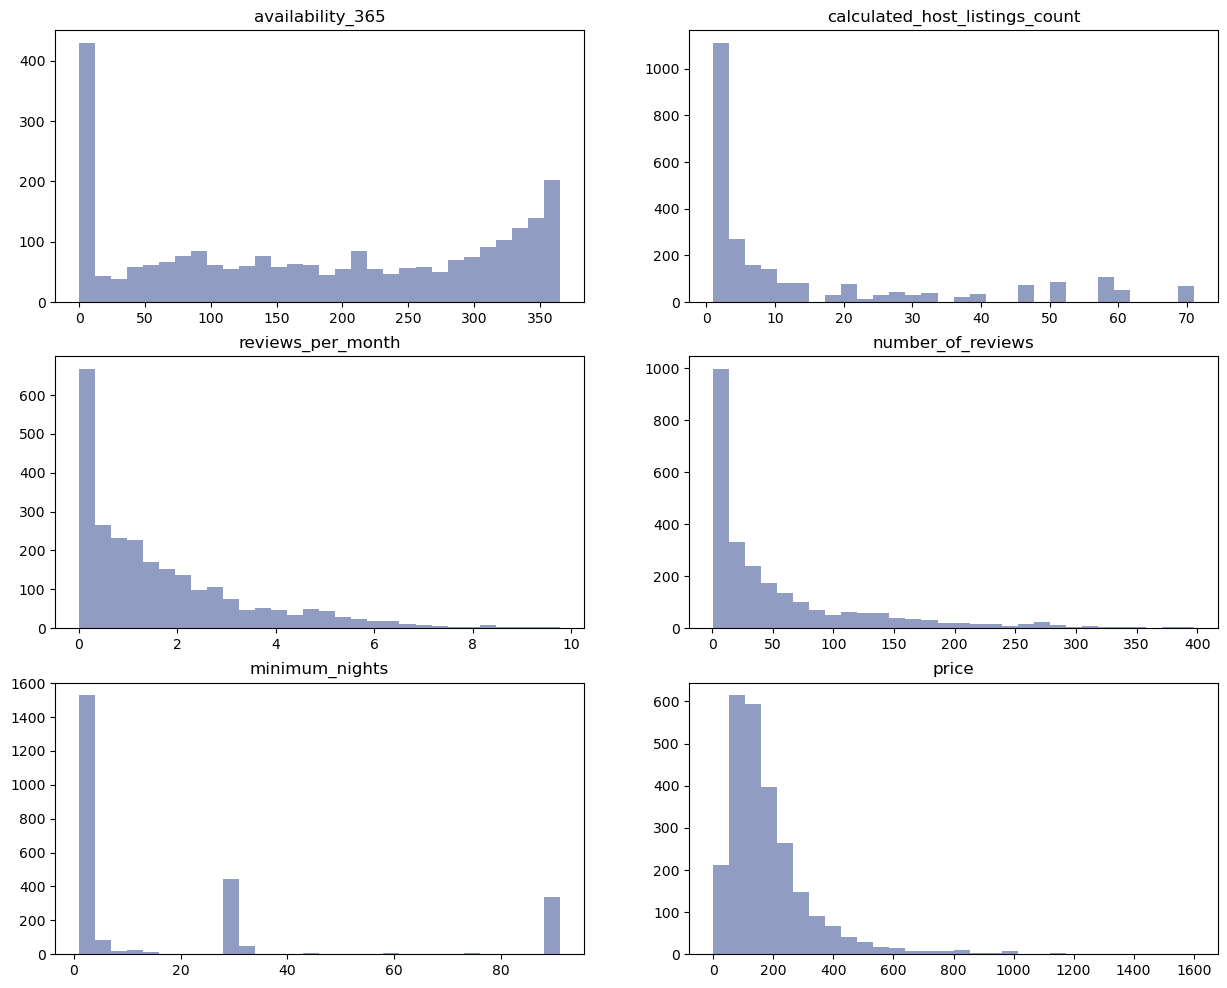

In [27]:
# Снова визуализирую распределения переменных, чтобы удостовериться в том, что выбросы были обработаны. 
# Действительно, графики стали более наглядными, шкала оси х более укрупненная благодаря удалению большей части выбросов

fig, ax = plt.subplots(3,2, figsize=(15,12))

#1 график
ax[0][0].hist(df3['availability_365'], bins=30, color = '#909CC2')#гистограмма
ax[0][0].set_title("availability_365") #заголовок

#2 график
ax[0][1].hist(df3['calculated_host_listings_count'], bins=30, color = '#909CC2')
ax[0][1].set_title("calculated_host_listings_count") #заголовок


#3 график
ax[1][0].hist(df3['reviews_per_month'], bins=30, color = '#909CC2')
ax[1][0].set_title("reviews_per_month")

#4 график
ax[1][1].hist(df3['number_of_reviews'], bins=30, color = '#909CC2')
ax[1][1].set_title("number_of_reviews")

#5 график
ax[2][0].hist(df3['minimum_nights'], bins=30, color = '#909CC2')
ax[2][0].set_title("minimum_nights")

ax[2][1].hist(df3['price'], bins=30, color = '#909CC2')
ax[2][1].set_title("price")


## Задание 4 (1.75 балл): Создание новых признаков

In [29]:
# Создаю признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города.
# Координаты центра Бостона, взятые с сайта https://batchgeo.com/map/latitude-longitude: 42°21′N 71°04′W
# Расстояние между координатами буду находить по Евклидовой формуле sqrt((x1-x2)^2+(y1-y2)^2)
df3['distance_to_city_center_km'] = np.sqrt((42.21 - df3.latitude)**2 + (-71.04 - df3.longitude)**2)


C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1516\3226120723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance_to_city_center_km'] = np.sqrt((42.21 - df3.latitude)**2 + (-71.04 - df3.longitude)**2)


In [32]:
# Использую метод datetime.strptime() для преобразования строки в дату времени
from datetime import datetime

now_date = datetime.strptime("2023-05-05", "%Y-%m-%d")

# Источник: https://www.delftstack.com/ru/howto/python/how-to-convert-string-to-datetime/

In [33]:
# Создаю новый признак "days_since_last_review" на основе столбца 'last_review'.
df3['days_since_last_review']=now_date-df3['last_review']

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1516\1233645408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['days_since_last_review']=now_date-df3['last_review']


In [118]:
# Создаю новый признак 'booking_rate' на основе столбцов 'availability_365' и 'number_of_reviews'.
df3['booking_rate'] = df3.number_of_reviews/df3.availability_365

# и проверяю
df3
        

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1516\1116493630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['booking_rate'] = df3.number_of_reviews/df3.availability_365


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km,days_since_last_review,booking_rate
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.364130,-71.029910,Entire home/apt,132,32,24,2022-09-05,0.26,1,87,2,Exempt: This listing is a hotel or motel,0.154460,242 days,0.275862
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,Roxbury,42.328440,-71.095810,Entire home/apt,149,3,118,2022-12-05,0.69,10,21,8,Approved by the government,0.130930,151 days,5.619048
2,2021489,Spacious Updated Boston Room/Condo,10197317,Shannon,South Boston,42.333750,-71.047670,Private room,231,29,86,2022-08-31,1.02,5,342,1,STR-383155,0.123987,247 days,0.251462
3,2108738,Back Bay Studio,10750832,Tom,Back Bay,42.350400,-71.088910,Entire home/apt,70,91,34,2016-08-14,0.30,1,0,0,STR-453623,0.148675,2455 days,inf
4,2126053,"Studio, w kitchenette, in owner's Beacon Hill ...",10844648,Janet,Beacon Hill,42.357710,-71.069780,Entire home/apt,165,29,117,2023-03-14,1.08,1,147,6,STR-395757,0.150682,52 days,0.795918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,837538755134178518,Cute and Cozy Studio!,409684302,Justin And Mandy,South End,42.340777,-71.078816,Entire home/apt,172,1,1,2023-03-02,1.00,37,293,1,Exempt: This listing is a hotel or motel,0.136416,64 days,0.003413
3841,826364677804486229,Spacious Bungalow Condo | Inquire for discounts,57928107,Aicha,Mattapan,42.281099,-71.094026,Entire home/apt,243,1,1,2023-03-18,1.00,4,357,1,STR-093872,0.089297,48 days,0.002801
3842,837665944621160923,Mezzanine Place next to Airport,439013531,Peter,East Boston,42.381982,-71.025952,Entire home/apt,137,1,2,2023-03-15,2.00,5,328,2,STR-493257,0.172555,51 days,0.006098
3843,837676098532127827,3 bdrm apt near Airport&Downtown,439013531,Peter,East Boston,42.380420,-71.026070,Entire home/apt,184,1,3,2023-03-18,3.00,5,312,3,STR-493256,0.170988,48 days,0.009615


<AxesSubplot:ylabel='Frequency'>

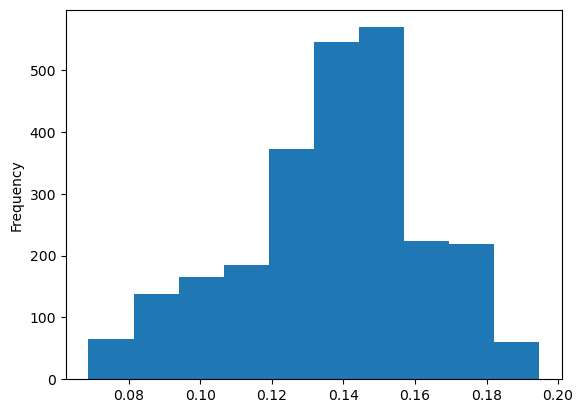

In [42]:
# Исследую распределения новых признаков
df3['distance_to_city_center_km'].plot(kind='hist')

# Распределение близко к симметричному нормальному. Имеется небольшой скос влево.

<AxesSubplot:ylabel='Frequency'>

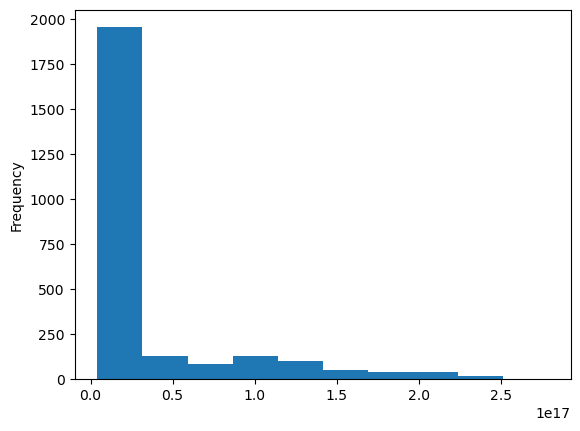

In [65]:
df3['days_since_last_review'].astype('int64').plot(kind='hist')

# Распределение несимметричное, правостороннее

<AxesSubplot:>

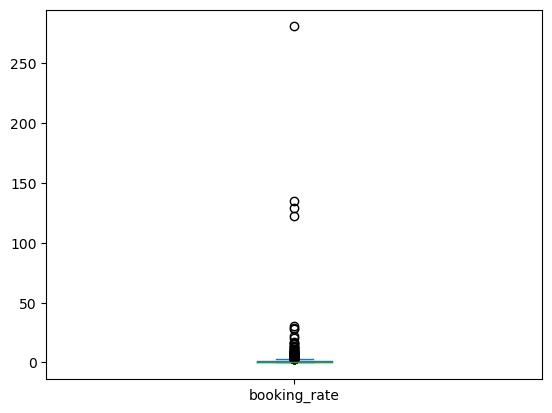

In [68]:
df3['booking_rate'].plot(kind='box')

# Распределение несиммметричное, правостороннее

## Задание 5 (1.5 балла): Время статистики!

In [39]:
#Рассчитаю описательные статистики для категориальных переменных.

In [40]:
# Отмечу, что переменные "id" и "host_id" относятся к категориальным, несмотя на их численный вид. Конвертирую их в строковой тип
df3['id'] = df['id'].astype (str)
df3['host_id'] = df['host_id'].astype (str)

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1268\2816136219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['id'] = df['id'].astype (str)
C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1268\2816136219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['host_id'] = df['host_id'].astype (str)


In [41]:
# Вывожу описательные статистики для категориальных переменных
df3.describe(include=[np.object])

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1268\3611480323.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df3.describe(include=[np.object])


,id,name,host_id,host_name,neighbourhood,room_type,license
count,2542,2542,2542,2542,2542,2542,2542
unique,2542,2468,1044,771,25,4,1022
top,3781,Luxury 2BD/2BA Near Logan Airport and T station,212359760,Evonify,Dorchester,Entire home/apt,Exempt: This listing is a unit that has contra...
freq,1,7,67,72,320,1697,209


В связи с тем, что все описательные статистики представлены в таблице выше с помощью метода describe(), я продемонстрирую расчет путем отдельных статистических методов на примере одной переменной df3.name.count()


In [43]:
df3.name.nunique()

2468

In [44]:
df3.name.mode()

0    Luxury 2BD/2BA Near Logan Airport and T station
Name: name, dtype: object

### Вывод для категориальных переменных. 
Среди категориальных переменных представлены номинальные переменные. Колонки "name", "host_name", "license", "host_id" характеризуются множеством уникальных значений (в переменной "id" все значения уникальны), в то время как у переменных "neighbourhood" и "room_type" количество уникальных значений не так велико, исходя из чего, можно заметить, что Dorchester - округ, в котором больше всего предложений по жилью, а превалирующий тип жилья, который предлагается - Entire home/apt.    

In [46]:
# Вывожу описательные статистики для числовых переменных
df3.describe(exclude=[np.object])

C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1268\2217325634.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df3.describe(exclude=[np.object])
C:\Users\AcerA3\AppData\Local\Temp\ipykernel_1268\2217325634.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df3.describe(exclude=[np.object])


,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center_km,days_since_last_review,booking_rate
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542,2542.000000
unique,NaN,NaN,NaN,NaN,NaN,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2023-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2023-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,42.335987,-71.081318,186.513375,19.985051,53.822581,NaN,1.691511,14.881983,179.809205,16.573171,0.137240,384 days 16:06:59.197482296,inf
std,0.029121,0.032720,153.469846,30.400433,69.994307,NaN,1.757167,20.042896,127.939208,21.657870,0.025750,580 days 01:22:28.703129272,NaN
min,42.235300,-71.172480,0.000000,1.000000,1.000000,NaN,0.010000,1.000000,0.000000,0.000000,0.068731,47 days 00:00:00,0.002740
25%,42.318875,-71.098028,90.000000,1.000000,6.000000,NaN,0.310000,1.000000,62.000000,1.000000,0.122228,64 days 06:00:00,0.053169


В связи с тем, что все описательные статистики представлены в таблице выше с помощью метода describe(), я продемонстрирую расчет путем отдельных статистических методов на примере одной переменной df3.price.mode()

In [48]:
df3.price.median()

147.0

In [49]:
df3.price.mean()

186.51337529504326

In [50]:
df3.price.std()

153.4698462925874

In [51]:
df3.price.min()

0

In [52]:
df3.price.max()

1600

In [53]:
df3.price.quantile(0.25)

90.0

In [54]:
df3.price.quantile(0.75)

231.75

### Вывод относительно трех количественных переменных. 
Касаемо признака "distance_to_city_center_km", исходя из представленной статистики ясно, что большинство значений находятся близко к среднему значению, а значения, находящиеся ближе к хвостам распределения, становятся все более редкими. Это говорит о том, что переменная имеет нормальное распределение. Таким образом, можно заключить, что большинство квартир находятся на среднем расстоянии от центра города, а квартиры, находящиеся дальше или ближе, встречаются реже. Переменная "availability_365", интерпретирующаяся как количество доступных дней для бронирования в течение следующих 365 дней имеет схожую тендннцию, однако, наблюдается скос влево, что говорит о том, что большинство объектов имеют довольно высокую доступность для бронирования в течение следующих 365 дней. У переменной price обратная ситуация, наблюдается скос вправо, что говорит о том, что на рынке превалирует жилье с ценой ниже среднего. 

In [111]:
# Рассчитаю релевантные описательные статистики для трех признаков, сгруппировав данные по категориальным переменным. 

# Иерархия стоимости арендуемого жилья в авизимости от типа жилищных условий выстраивается следующим образом:
# Hotel room > Entire home/apt > Private room > Shared room 
df3.groupby(df3['room_type'])['price'].mean()

room_type
Entire home/apt    230.737183
Hotel room         256.533333
Private room        95.344743
Shared room         59.666667
Name: price, dtype: float64

In [117]:
# Минимальное количество ночей, которое необходимо забронировать, больше в типе жилья "Shared room" 
# Меньше всего ночей необходимых для брони в отелях.
df3.groupby(df3['room_type'])['minimum_nights'].mean().sort_values(ascending=False)

room_type
Shared room        33.416667
Private room       25.089242
Entire home/apt    17.544490
Hotel room          7.000000
Name: minimum_nights, dtype: float64

In [116]:
# Самые дорогие районы по аренде жилья в среднем - это  South Boston Waterfront, Back Bay и Chinatown  
df3.groupby(df3['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
South Boston Waterfront    298.814815
Back Bay                   261.245614
Chinatown                  257.800000
Charlestown                248.684211
West End                   241.241379
Downtown                   240.309237
Fenway                     236.925532
South Boston               225.286957
Beacon Hill                219.676768
North End                  218.830986
West Roxbury               212.384615
South End                  203.628272
Leather District           199.000000
Jamaica Plain              185.830303
Bay Village                185.025000
Roxbury                    143.824742
Dorchester                 142.400000
East Boston                142.308571
Mattapan                   140.239130
Roslindale                 139.333333
Longwood Medical Area      127.666667
Brighton                   127.598639
Mission Hill               125.200000
Allston                    122.981481
Hyde Park                  105.785714
Name: price, dtype: float64

## Задание 6 (1 балл): Корреляции

In [57]:
# Найду три самых сильных линейных взаимосвязи.
# Для начала построю таблицу с корреляциями всех признаков



In [58]:
df3[['latitude', 'longitude', 'price', 'minimum_nights', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'distance_to_city_center_km', 'days_since_last_review', 'booking_rate']].corr()

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center_km,booking_rate
latitude,1.000000,0.363824,0.139169,-0.027998,0.133370,0.211633,-0.009206,0.115044,0.857512,0.016613
longitude,0.363824,1.000000,0.110077,-0.127739,0.152677,0.178335,0.130722,0.109488,-0.106368,0.010000
price,0.139169,0.110077,1.000000,-0.156407,0.076135,0.000494,0.133026,0.075449,0.075334,0.012474
minimum_nights,-0.027998,-0.127739,-0.156407,1.000000,-0.434610,-0.250465,-0.290173,-0.429520,0.028458,-0.013016
reviews_per_month,0.133370,0.152677,0.076135,-0.434610,1.000000,0.153297,0.153201,0.843851,0.074002,0.057404
calculated_host_listings_count,0.211633,0.178335,0.000494,-0.250465,0.153297,1.000000,0.315063,0.125377,0.103467,-0.042518
availability_365,-0.009206,0.130722,0.133026,-0.290173,0.153201,0.315063,1.000000,0.114937,-0.077425,-0.168752
number_of_reviews_ltm,0.115044,0.109488,0.075449,-0.429520,0.843851,0.125377,0.114937,1.000000,0.061367,0.047451
distance_to_city_center_km,0.857512,-0.106368,0.075334,0.028458,0.074002,0.103467,-0.077425,0.061367,1.000000,0.013151
booking_rate,0.016613,0.010000,0.012474,-0.013016,0.057404,-0.042518,-0.168752,0.047451,0.013151,1.000000


In [59]:
# Избавлюсь от минусов
corr_data = df3[['latitude', 'longitude', 'price', 'minimum_nights', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'distance_to_city_center_km', 'days_since_last_review', 'booking_rate']].corr().abs()
corr_data

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center_km,booking_rate
latitude,1.000000,0.363824,0.139169,0.027998,0.133370,0.211633,0.009206,0.115044,0.857512,0.016613
longitude,0.363824,1.000000,0.110077,0.127739,0.152677,0.178335,0.130722,0.109488,0.106368,0.010000
price,0.139169,0.110077,1.000000,0.156407,0.076135,0.000494,0.133026,0.075449,0.075334,0.012474
minimum_nights,0.027998,0.127739,0.156407,1.000000,0.434610,0.250465,0.290173,0.429520,0.028458,0.013016
reviews_per_month,0.133370,0.152677,0.076135,0.434610,1.000000,0.153297,0.153201,0.843851,0.074002,0.057404
calculated_host_listings_count,0.211633,0.178335,0.000494,0.250465,0.153297,1.000000,0.315063,0.125377,0.103467,0.042518
availability_365,0.009206,0.130722,0.133026,0.290173,0.153201,0.315063,1.000000,0.114937,0.077425,0.168752
number_of_reviews_ltm,0.115044,0.109488,0.075449,0.429520,0.843851,0.125377,0.114937,1.000000,0.061367,0.047451
distance_to_city_center_km,0.857512,0.106368,0.075334,0.028458,0.074002,0.103467,0.077425,0.061367,1.000000,0.013151
booking_rate,0.016613,0.010000,0.012474,0.013016,0.057404,0.042518,0.168752,0.047451,0.013151,1.000000


In [60]:
# создам Series со значениями корреляции каждой пары признаков
corr_data = corr_data.unstack()

# сортирую Series по убыванию корреляции и убираю повторяющиеся значения
sorted_pairs =corr_data.sort_values(ascending=False).drop_duplicates()

# вывожу топ-3 пары с наибольшей корреляцией
top_pairs = sorted_pairs[1:4]
print(top_pairs)

distance_to_city_center_km  latitude             0.857512
number_of_reviews_ltm       reviews_per_month    0.843851
minimum_nights              reviews_per_month    0.434610
dtype: float64


### Пояснения и выводы
Переменные number_of_reviews_ltm и reviews_per_month,  distance_to_city_center_km и latitude характеризуется сильной зависимостью в связи с тем, что они являются производными друг друга.
Корреляция между minimum_nights и reviews_per_month отрицательная, и объясняется тем, что чем меньше минмальное количество ночей, которое необходимо забронировать, тем большим спросом пользуется жилье.

## Задание 7 (2 балла): Визуализации

In [ ]:
# Построю 6 содержательных визуализаций

Text(0.5, 1.0, 'Апартаменты лидируют среди типов предоставляемого жилья в аренду')

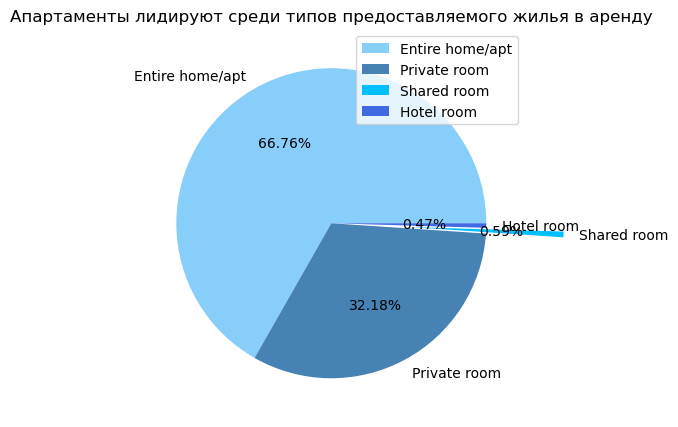

In [126]:
# Круговая диаграмма
plt.figure(figsize=[5, 8])
plt.pie(x = df3["room_type"].value_counts().values,
       labels = df3["room_type"].unique(),
       explode = [0, 0, 0.5, 0],
       colors = ['lightskyblue', 'steelblue', 'deepskyblue', 'royalblue'],
        autopct = '%1.2f%%', 
        labeldistance = 1.1); 
plt.legend();
plt.title('Апартаменты лидируют среди типов предоставляемого жилья в аренду')

Text(0.5, 1.0, 'Наиболее распространенная ситуация - когда у жилья мало отзывов (от 0 до 20)')

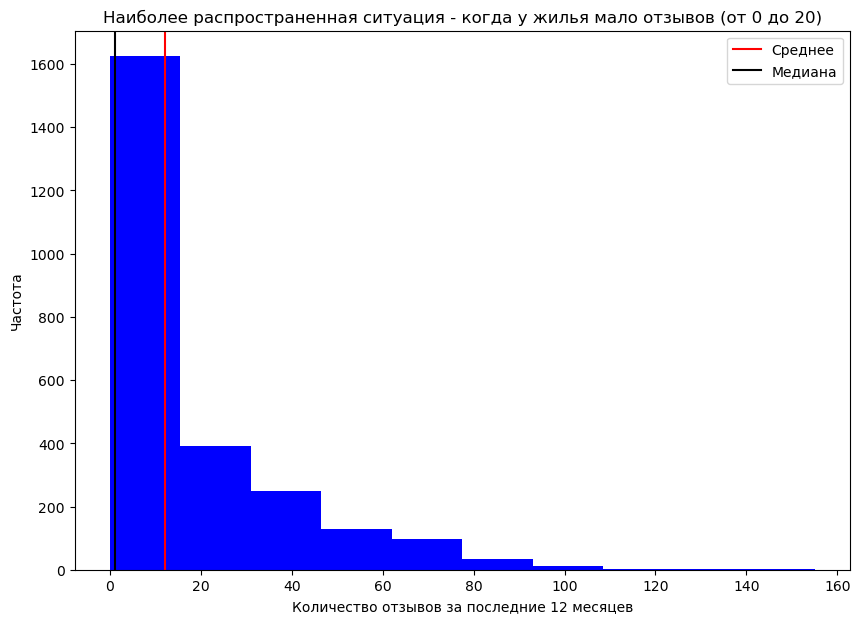

In [131]:
# Гистограмма
plt.figure(figsize = [10, 7]) #размер графика

plt.hist(df3['number_of_reviews_ltm'], bins=10, color = "blue") #гистограмма
plt.xlabel("Количество отзывов за последние 12 месяцев") #подпись оси x
plt.ylabel("Частота") #подпись оси y

plt.axvline(df['number_of_reviews_ltm'].mean(), color = "red", label = "Среднее") #вертикальная линия (среднее)
plt.axvline(df['number_of_reviews_ltm'].median(), color = "black", label = "Медиана") #вертикальная линия (среднее)
plt.legend(); 
plt.title('Наиболее распространенная ситуация - когда у жилья мало отзывов (от 0 до 20)')

In [134]:
# Группирую данные для последующего построения линейного графика
dd=df3.groupby(df3["last_review"].dt.month)['price'].mean()
dd

last_review
1     187.070632
2     208.102941
3     181.875342
4     161.674419
5     187.428571
6     208.370370
7     188.758621
8     173.711268
9     154.054054
10    190.557471
11    182.103175
12    185.990431
Name: price, dtype: float64

Text(0.5, 1.0, 'Изменение средней цены за ночь в течение года')

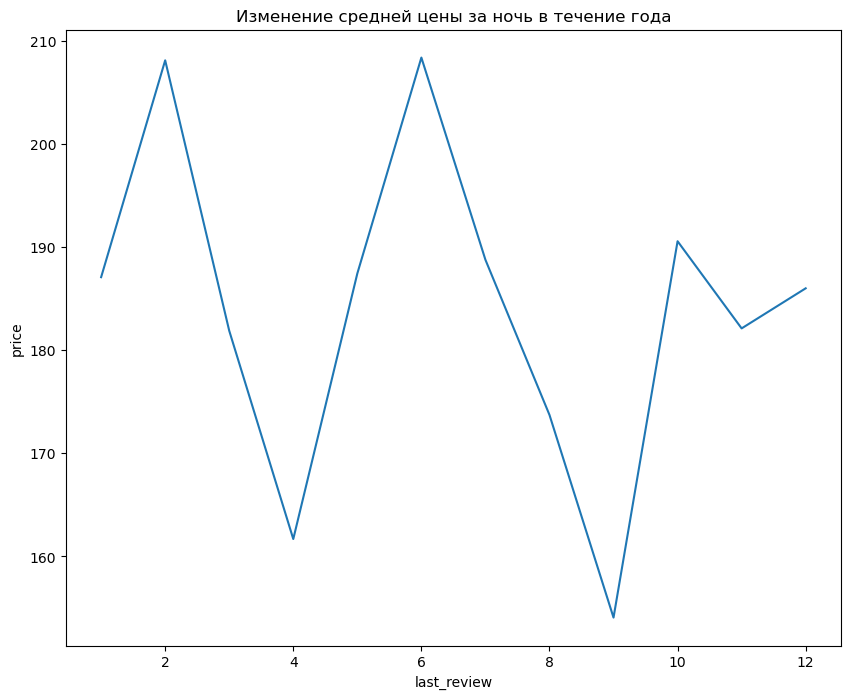

In [137]:
# Линейный график
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(dd)
ax.set_xlabel("last_review")
ax.set_ylabel("price")
ax.set_title("Изменение средней цены за ночь в течение года")


Text(0.5, 1.0, 'Признаки широта местоположения объекта и среднее расстояние от жилья до центра имеют высокую корреляцию.')

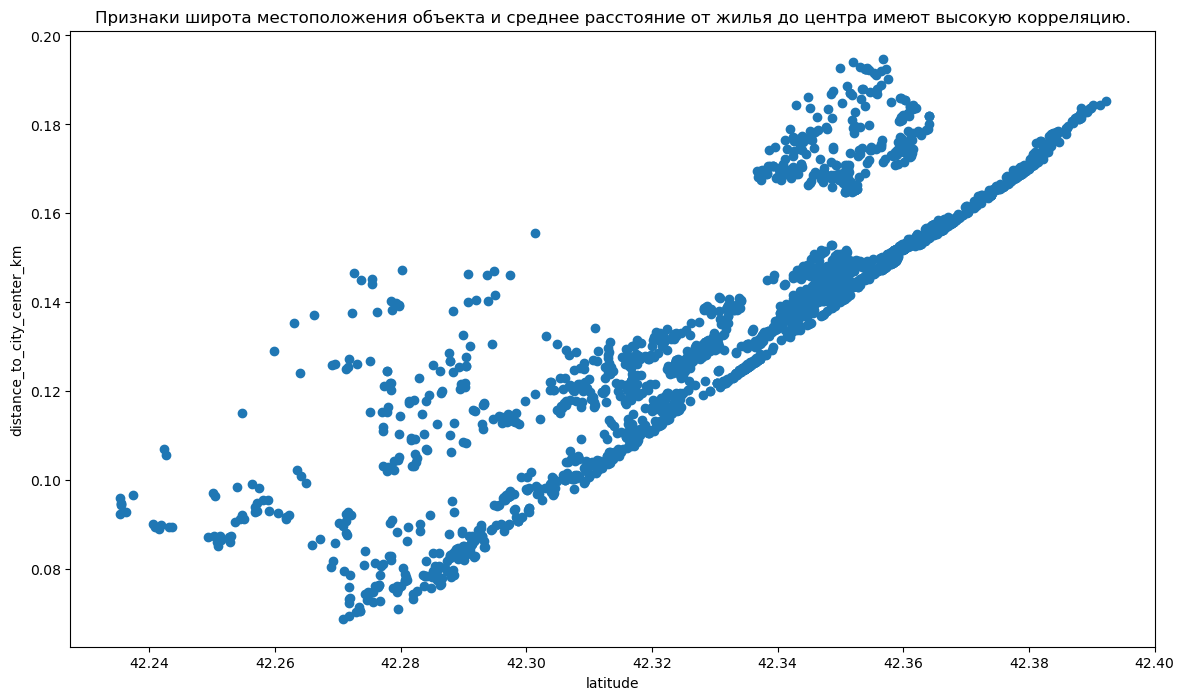

In [140]:
# Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(14,8))
graph = ax.scatter(df3["latitude"], df3["distance_to_city_center_km"])
ax.set_xlabel("latitude")
ax.set_ylabel("distance_to_city_center_km")
ax.set_title("Признаки широта местоположения объекта и среднее расстояние от жилья до центра имеют высокую корреляцию.")
# однако, важно учесть, что одна переменная производная от другой, данный график носит исключительно демонстративный характер

In [70]:
import seaborn as sns

In [141]:
# Тепловая карта
corr_data = df[[
    'minimum_nights', 
    'reviews_per_month', 
    'number_of_reviews_ltm']].corr()
corr_data

,minimum_nights,reviews_per_month,number_of_reviews_ltm
minimum_nights,1.000000,-0.399332,-0.389835
reviews_per_month,-0.399332,1.000000,0.863387
number_of_reviews_ltm,-0.389835,0.863387,1.000000


Text(0.5, 1.0, 'Диаграмма рассеяния')

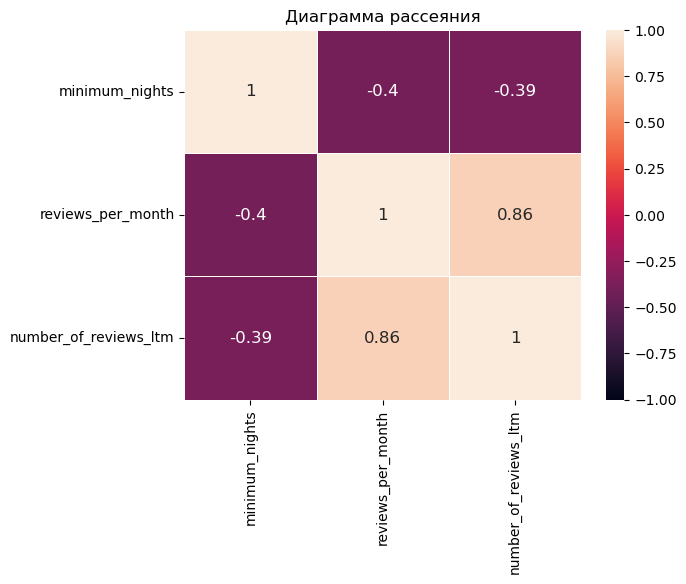

In [142]:
import seaborn as sns
sns.heatmap(
    corr_data, 
    linewidths = 0.5, 
    annot = True, 
    vmax = 1, 
    vmin = -1, 
    linecolor = "white", 
    annot_kws = {'size': 12} 
)
plt.title('Диаграмма рассеяния')

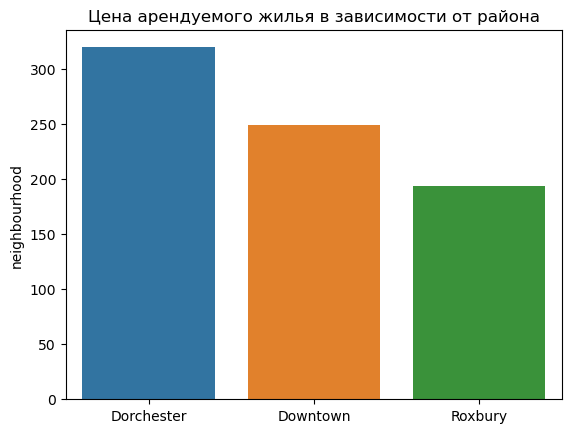

In [146]:
# Столбчатая диаграмма
top_neighbourhood = df3['neighbourhood'].value_counts().nlargest(3).index.tolist()
sns.barplot(x=top_neighbourhood, y=df3['neighbourhood'].value_counts().loc[top_neighbourhood])
plt.title('Цена арендуемого жилья в зависимости от района')
ax.set_xlabel("neighbourhood")
ax.set_ylabel("price")
plt.show()

#Здесь мы использовали метод `nlargest()` для получения топ-3 значений по частоте упоминания в столбце `license`. Затем мы передали эти значения в метод `loc()` чтобы получить соответствующие частоты, которые затем использовались для построения столбчатой диаграммы.

## Задание 8 (1 балл): Немного исследований

In [ ]:
#Исследовав данные, я сгруппировала среднее количество размещаемых объявлений от хозяев по годам и нашла следующую особенность:

In [102]:
ddd=df3.groupby(df3["last_review"].dt.year)['calculated_host_listings_count'].mean()
ddd

last_review
2014     1.500000
2015     1.583333
2016     2.400000
2017     1.866667
2018     5.943396
2019     5.073620
2020    10.020408
2021    15.198347
2022    11.897959
2023    19.575805
Name: calculated_host_listings_count, dtype: float64

Text(0.5, 1.0, 'Динамика общего количества объявлений хозяина за период с с 2014 по 2023.')

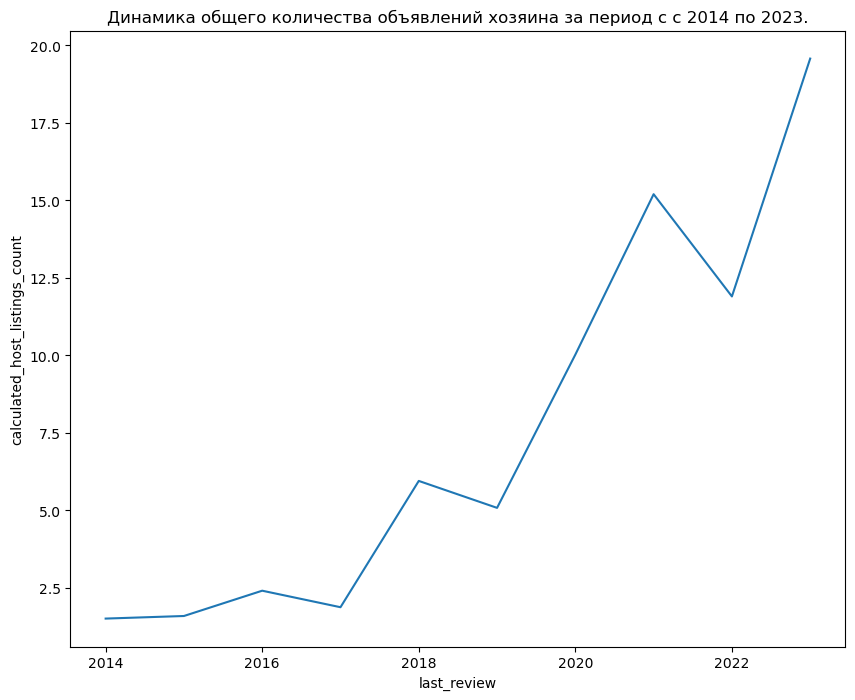

In [104]:
# Линейный график
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ddd)
ax.set_xlabel("last_review")
ax.set_ylabel("calculated_host_listings_count")
ax.set_title("Динамика роста среднего количества объявлений по сдаче жилья в аренду за период с 2014 по 2023.")


Заметила интересный тренд скачкообразного роста количества объявлений сдачи жилья в аренду. С 2014 по 2017 год кривая количества объявлений была относительно стабильна. Впоследствии среднее количество объявлений росло, однако, имея спады в периоды с 2018 по 2019 и с 2021 по 2022. Возможно это связано с экономической ситуацией в штате. Также могу предположить, что перепады в упомянутые периоды могут быть связаны с обострениями и послаблениями мер при пандемии Covid-19